## Explore Data

In [1]:
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
from util_jupyter import *

In [2]:
!ls -1 data/

Admission_Predict.csv
Admission_Predict_Ver1.1.csv
Titanic.csv


In [3]:
df = pd.read_csv("data/Admission_Predict.csv")
sdf(df)

rows = 400, cols =  9, ['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA', 'Research', 'Chance of Admit ']
HEAD:


,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72


TAIL:


,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
397,398,330,116,4,5.0,4.5,9.45,1,0.91
398,399,312,103,3,3.5,4.0,8.78,0,0.67
399,400,333,117,4,5.0,4.0,9.66,1,0.95


--------------------------------------------------


In [4]:
# simplify column names
df.columns=['SerNo', 'GRE', 'TOEFL', 'UnivRating', 'SOP', 'LOR', 'CGPA', 'Research', 'ChanceAdmit']

# check for nulls
df.isnull().sum()

SerNo          0
GRE            0
TOEFL          0
UnivRating     0
SOP            0
LOR            0
CGPA           0
Research       0
ChanceAdmit    0
dtype: int64

In [5]:
# columns datatypes
df.dtypes

SerNo            int64
GRE              int64
TOEFL            int64
UnivRating       int64
SOP            float64
LOR            float64
CGPA           float64
Research         int64
ChanceAdmit    float64
dtype: object

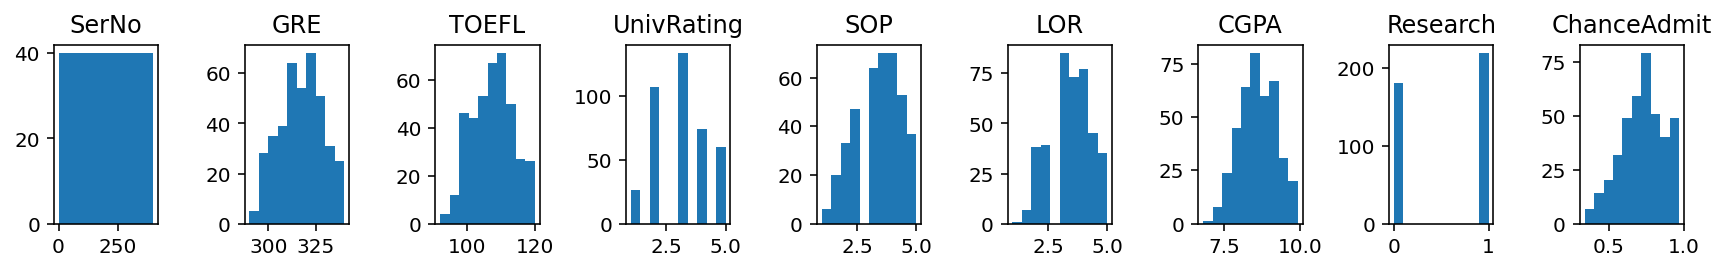

In [6]:
fig, axes = plt.subplots(nrows=1, ncols=9,figsize=(12,2))
ax = axes.flatten()
cols = list(df.columns)
for ii in range(len(cols)):
    col = cols[ii]
    x = df[col].values
    ax[ii].hist(x)
    ax[ii].set_title(col)

fig.tight_layout()
plt.show() ;

In [7]:
# dealing with nulls
# ==========================
# mask = pd.isnull(aa['ii'])
# aa[mask]
# ==========================
# df_clean = df.fillna(0) # fill all nulls with zeros 
# df["Gender"].fillna("No Gender", inplace = True)
# ==========================
# filling null value with previous ones (in same columns)  
# df_clean = df.fillna(method ='pad') 
# filling null value using next value (in same columns)  
# df_clean = df.fillna(method ='bfill') 
# ==========================
# df_clean = df.replace(to_replace = np.nan, value = -99)
# ==========================
# Using interpolate()
# df_clean = df.interpolate(method ='linear', limit_direction ='forward')
# ==========================
# simply dropping rows with nulls
# df_clean = df.dropna()             # drop row if any value is null
# df_clean = df.dropna(axis = 0, how ='any')  
# ==========================
# df_clean = df.dropna(how = 'all')  # drop row only if all values are null
# ==========================
# drop columns with nulls
# df_clean = df.dropna(axis = 1) 

In [8]:
# https://www.kaggle.com/mohansacharya/graduate-admissions/tasks
# correlations
# identify essential features

from scipy.stats import ks_2samp  

def top_corollaries(df, out_col=None):
    """
    # accepts the DataFrame
    # compares distribution of data in columns with out_col
    # returns dataframe with columns ['col','p_val'] sorted
    # by p_val with most important columns on top.
    #
    # To compare two distributions we will use Kolmogorov-Smirnov test.
    #  - https://en.wikipedia.org/wiki/Kolmogorov%E2%80%93Smirnov_test
    # Note - this is just one of many tests, for example, read this discussion:
    #  - https://stats.stackexchange.com/questions/1001/is-spearmans-correlation-coefficient-usable-to-compare-distributions
    # 
    # function ks_2samp(array1, array2) 
    # compares distributions of values in two arrays
    # and returns p_value
    #    p_value > 0.4 - distributions are very similar (identical)
    #    p_value very small - distributions differ
    """
    ks = []
    cols = sorted(set(list(df.columns)) - set([out_col]))
    vals_out = df[out_col].values
    for col in cols:
        vals_col = df[col].values        
        p_val = ks_2samp(vals_out, vals_col)[0]  # higher value for similar distributions
        ks.append((col, p_val))
        print("%s => %.6f" % (col,p_val))
    # pick 10 most correlated variables.
    # create DataFrame [label, p_val]
    df_ks = pd.DataFrame(data = ks, columns = ['col', 'p_val'])
    # sort by p_val in decreasing order
    df_ks = df_ks.sort_values(by='p_val',ascending=False)
    return df_ks

In [9]:
# function ks_2samp(array1, array2) 
# compares distributions of values in two arrays
# and returns p_value
#    p_value > 0.4 - distributions are very similar (identical)
#    p_value very small - distributions differ

print("small p_values indicate different distributions")
print('-'*40)
print("label => p_value") 
print('-'*40)

df_ks = top_corollaries(df, out_col='ChanceAdmit')
display(df_ks.head(20))

small p_values indicate different distributions
----------------------------------------
label => p_value
----------------------------------------
CGPA => 1.000000
GRE => 1.000000
LOR => 1.000000
Research => 0.547500
SOP => 1.000000
SerNo => 1.000000
TOEFL => 1.000000
UnivRating => 1.000000


,col,p_val
0,CGPA,1.0000
1,GRE,1.0000
2,LOR,1.0000
4,SOP,1.0000
5,SerNo,1.0000
6,TOEFL,1.0000
7,UnivRating,1.0000
3,Research,0.5475


In [10]:
# ANOVA
# https://www.marsja.se/four-ways-to-conduct-one-way-anovas-using-python/
import statsmodels
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [11]:
# 'GRE', 'TOEFL', 'UnivRating', 'SOP', 'LOR', 'CGPA', 'Research', 'ChanceAdmit'
mod = ols('CGPA ~ ChanceAdmit', data=df).fit()

In [12]:
aov_table = sm.stats.anova_lm(mod, typ=2)

In [13]:
print(aov_table)
# for single model
#   sum_sq : Sum of squares
#   df     : Degrees of freedom
#   F      : F statistic value for significance of adding model terms.
#   PR(>F) : P-value for significance of adding model terms.

                 sum_sq     df            F         PR(>F)
ChanceAdmit  108.204045    1.0  1278.734453  2.336514e-126
Residual      33.677993  398.0          NaN            NaN


In [15]:
# sm.stats.anova_lm?